<a href="https://colab.research.google.com/github/charlespimentel/PROJ_QUEIMA_BR/blob/main/Trabalho_D_S_Prov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [213]:
pip install prov

In [214]:
import prov.model as prov
import datetime

In [215]:
from prov.model import ProvDocument

In [216]:
# Criando um novo documento de proveniância
d1 = ProvDocument()  # d1 agora é um documento de proveniência vazio

In [217]:
# Declarando namespace
d1.add_namespace('now', 'https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/nownews/')
# Declarando namespace
d1.add_namespace('nowpeople', 'https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/nownews/people/')
# Declarando namespace
d1.add_namespace('art', 'https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/ns/#')

<Namespace: art {https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/ns/#}>

In [218]:
#Entidade
e1 = d1.entity('now:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx')
d1.agent('nowpeople:Mauro, Ronilson, Charles')

<ProvAgent: nowpeople:Mauro, Ronilson, Charles>

In [219]:
# Atribuindo o artigo ao agente
d1.wasAttributedTo(e1, 'nowpeople:Mauro, Ronilson, Charles')

<ProvAttribution: (now:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx, nowpeople:Mauro, Ronilson, Charles)>

In [220]:
# Declarando namespace
d1.add_namespace('Inpe', 'https://queimadas.dgi.inpe.br/queimadas/bdqueimadas')
# Declarando namespace
d1.add_namespace('Lasa', 'https://lasa.ufrj.br/')

<Namespace: Lasa {https://lasa.ufrj.br/}>

In [221]:
d1.entity( 'Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20',{'prov:label':'Inpe_12_20','prov: type':'void: Dataset'}) 
d1.entity( 'Lasa:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20' ,{'prov:label':'Lasa_12_20','prov: type':'void: Dataset'}) 

<ProvEntity: Lasa:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20>

In [222]:
# Adicionando uma Atividade
d1.add_namespace('is', 'https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/is/#')
d1.activity('is:writeArticle')

<ProvActivity: is:writeArticle>

In [223]:
# Uso e Geração
d1.used('is:writeArticle', 'Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20')
d1.used('is:writeArticle', 'Lasa:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20')
d1.wasGeneratedBy('now:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx', 'is:writeArticle')

<ProvGeneration: (now:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx, is:writeArticle)>

**RELAÇÃO ENTIDADE - AGENTE**

In [225]:
agent    = input("Enter the name of the AGENT WHO is running the program: ")        #PROV-Agent
entity   = input("Enter the name of the ENTITY dataset: ")                          #PROV-Entity
activity = input("Enter the name of the ACTIVITY: ")                                #PROV-Activity
graph = entity 

Enter the name of the AGENT WHO is running the program: Equipe 07
Enter the name of the ENTITY dataset: Inpe/Lasa
Enter the name of the ACTIVITY: Predição de Queimada


**NAMESPACES**

In [230]:
d1.add_namespace('ufrj', 'http://www.ufrj.br/ppgi/')
d1.add_namespace('foaf', 'http://xmlns.com/foaf/0.1/')
d1.add_namespace('greco', 'http://www.ufrj.br/ppgi/greco/#')

<Namespace: greco {http://www.ufrj.br/ppgi/greco/#}>

In [231]:
# Adicionando Entidade
entity = "ufrj:"+ entity
e1 = d1.entity(entity)

# Adicionando Agente
agent = "foaf:"+ agent
d1.agent(agent)

# Atribuindo a execução do experimento ao PROV-Agent
d1.wasAttributedTo(e1, agent)

# Adicionando uma atividade
activity = "greco:"+ activity
d1.activity(activity)

# Geração
d1.wasGeneratedBy( entity, activity)

<ProvGeneration: (ufrj:ufrj:ufrj:Inpe/Lasa, greco:greco:greco:Predição de Queimada)>

In [232]:
# Adicionando um papel para o PROV-Agent
d1.agent(agent, {'prov:hadRole': 'Executor', 'foaf:mbox': '{pimentelufrj,mauropbastos,ronilsonpinho}@gmail.com', 'prov:attributedAtTime': str(datetime.datetime.utcnow())})
d1.entity(entity, {'prov:generatedAtTime': str(datetime.datetime.utcnow())})

<ProvEntity: ufrj:ufrj:ufrj:Inpe/Lasa>

In [233]:
d1.wasDerivedFrom('now:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx', 'Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20','Lasa:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Lasa_12_20')

<ProvDerivation: (now:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx, Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Data_Inpe_12_20)>

In [234]:
# O que temos até agora (in PROV-N)
print(d1.get_provn())

document
  prefix now <https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/nownews/>
  prefix nowpeople <https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/nownews/people/>
  prefix art <https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/ns/#>
  prefix Inpe <https://queimadas.dgi.inpe.br/queimadas/bdqueimadas>
  prefix Lasa <https://lasa.ufrj.br/>
  prefix is <https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx/is/#>
  prefix ufrj <http://www.ufrj.br/ppgi/>
  prefix foaf <http://xmlns.com/foaf/0.1/>
  prefix greco <http://www.ufrj.br/ppgi/greco/#>
  
  entity(now:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx)
  agent(nowpeople:Mauro, Ronilson, Charles)
  wasAttributedTo(now:https://github.com/charlespimentel/PROJ_QUEIMA_BR/blob/main/Paper_Vs.1.docx, nowpeople:Mauro, Ronilson, Charles)
  entity(Inpe:https://github.com/charlespimentel/PROJ_QUEIMA_BR/tree/main/Da

In [235]:
# visualizar o gráfico
from prov.dot import prov_to_dot
dot = prov_to_dot(d1)
dot.write_png('prov-artigo.png')

**GRAPH**

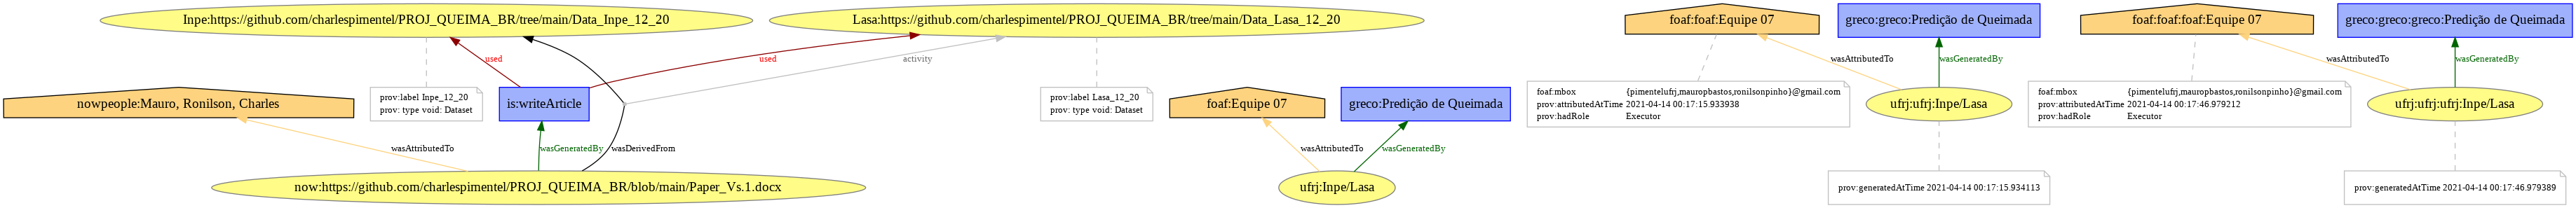

In [236]:
from IPython.display import Image
Image('prov-artigo.png')